## 23.03.22 for multiprocess phase diagram

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks

In [134]:
from scipy.signal import find_peaks
import numpy as np
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

mean = lambda x :np.mean(x[-500:])
get_std  = lambda x :np.std(x[-500:])

def get_groups(dtheta,sum_time=500):
    dtheta_c = np.cumsum(dtheta,axis=0)
    avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
    num_data = []
    for data in avg_dtheta[-500:]:
        diff_dtheta = np.diff(data)
        peaks, _ = find_peaks(diff_dtheta, height=0.01)
        num_data.append(np.diff(peaks))
    groups = []
    N = len(dtheta[-1])
    for diff in num_data:
        sort_re = np.sort(diff)[::-1]
        temp = []
        for i in sort_re[:5]:
            temp.append(i)
        if len(sort_re) == 0:
            temp = [N,0,0,0,0]
        else:
            for i in range(5- len(sort_re)):
                temp.append(0)
        groups.append(temp)
    return groups

def make_meanr(Km,N,theta_init,omega,t):
    K,m = Km
    theta, dtheta,rs = mf2(K,m=m,N=N,t_array=t,p_theta=theta_init,p_dtheta= omega,p_omega=omega)
    r = mean(rs)
    rstd = get_std(rs)
    g = np.mean(get_groups(dtheta)[-1000:],axis=0)
    g_std = np.std(get_groups(dtheta)[-1000:],axis=0)
    return r,rstd,g,g_std


In [273]:
K_ = np.vectorize(make_meanr)

In [274]:
Ks = np.arange(0,10,1)
ms = np.arange(0,6,2)
KK,MM = np.meshgrid(Ks,ms)

In [275]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 2
t = np.arange(0,3000,0.1)
K = 3
theta, dtheta,rs = mK((m,K),N=N,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)

In [276]:
class phase_diagram():
    def __init__(self,seed,N,m,t_end) -> None:
        self.theta_init,omega,_ = Normal(N,0,1,seed=seed)
        self.omega = np.sort(omega)
        self.t = np.arange(0,t_end+0.1/2,0.1)
        self.m = m

    def make_meanr(self,K,sum_time = 500):
        m = self.m
        t = self.t
        theta_init = self.theta_init
        omega = self.omega
        theta, dtheta,rs = mf2(K,m=m,N=N,t_array=t,p_theta=theta_init,p_dtheta= omega,p_omega=omega)
        r = mean(rs)
        rstd = get_std(rs)
        groups = get_groups(dtheta,sum_time)[-sum_time:]
        g = np.mean(groups,axis=0)
        g_std = np.std(groups,axis=0)
        return r,rstd,g,g_std


In [277]:
P_ = phase_diagram(10,N,m,t_end = 3000)

In [278]:
P_.make_meanr(1)

(0.04444227759901878,
 0.017569870486463274,
 array([17.592, 13.918, 11.8  ,  9.856,  9.24 ]),
 array([2.24622706, 1.84154175, 1.87189743, 1.11322235, 1.105622  ]))

In [279]:
r = mean(rs)
rstd = get_std(rs)
g = np.mean(get_groups(dtheta)[-500:],axis=0)
gstd = np.std(get_groups(dtheta)[-500:],axis=0)
sum_time = 1000
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)

0.012285935576510709 [0.         0.58349293 0.51847469 0.38584453 0.18122914] [429.      5.244   4.572   4.182   4.034]


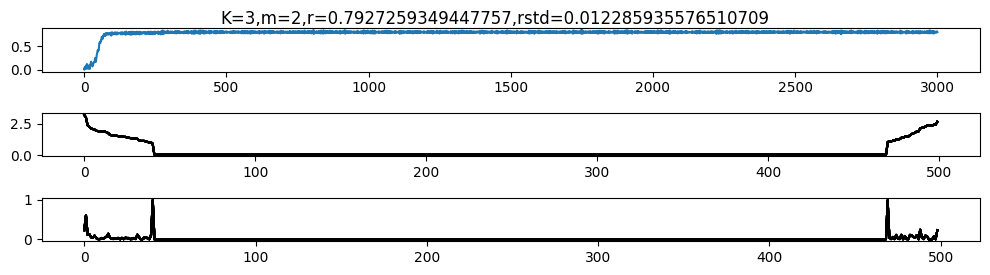

In [249]:
print(rstd,gstd,g)
plt.figure(figsize=(10,3))
plt.subplot(311)
plt.plot(t,rs)
plt.subplot(312)
plt.plot(abs(avg_dtheta[-100:].T),alpha=0.1,color='k');
plt.subplot(313)
plt.plot(abs(diff_avg_dtheta[-100:].T),alpha=0.1,color='k');
plt.suptitle(f'K={K},m={m},r={r},rstd={rstd}',y=0.9)
plt.tight_layout()

## Check group test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap

In [2]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)
m = 2
t = np.arange(0,2000,0.1)
K = 3
# theta, dtheta,rs = mK((m,K),N=N,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)

In [3]:
P_ = phase_diagram(15,N,m,t_end=3000)

In [4]:
P_.m = 6

In [5]:
Ks = np.linspace(0,10,51)
ms = np.linspace(0,10,51)
df = pd.DataFrame({'r':[0],'rstd':[0],'g1':[0],'g2':[0],'g3':[0],'g4':[0],'g5':[0]
                   ,'g1_std':[0],'g2_std':[0],'g3_std':[0],'g4_std':[0],'g5_std':[0],'K':Ks[0],'m':ms[0]})
df_Km = df.set_index(['K','m'])

In [6]:
KK,MM = np.meshgrid(Ks,ms)

In [26]:

# for K_,M_ in tqdm(list(zip(KK,MM))):
#     for K,m,test in zip(K_,M_,parmap.starmap(make_meanr,zip(K_,M_),N=N,theta_init=theta_random,omega=omega,t=t, pm_processes=8)):
#         r,rstd,g,gstd =test
#         temp = [r,rstd,*g,*gstd]
#         df_Km.loc[(K,m),:]=temp

In [7]:
for m in tqdm(ms):
    P_.m = m
    for K,test in zip(Ks,parmap.map(P_.make_meanr,Ks, pm_pbar=False, pm_processes=16)):
        r,rstd,g,gstd =test
        temp = [r,rstd,*g,*gstd]
        df_Km.loc[(K,m),:]=temp

  0%|          | 0/51 [00:00<?, ?it/s]

In [10]:
df_Km.unstack().r.to_numpy().shape

(100, 30)

In [11]:
df_Km

,,r,rstd,g1,g2,g3,g4,g5,g1_std,g2_std,g3_std,g4_std,g5_std
K,m,,,,,,,,,,,,
0.0,0.0,0.038430,0.021049,31.000,23.000,18.000,14.000,13.000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1,0.0,0.039551,0.022492,30.600,22.850,17.928,14.734,13.294,1.743560,0.653835,0.531804,0.991587,0.616088
0.2,0.0,0.041513,0.024276,23.000,17.080,14.394,13.034,12.326,0.000000,1.313621,0.939555,0.777717,0.612963
0.3,0.0,0.045913,0.027938,20.114,13.786,12.360,11.456,10.842,3.518665,1.893199,1.275304,0.632506,0.600863
0.4,0.0,0.052297,0.026375,16.804,13.052,11.752,10.862,10.338,2.029183,1.193858,1.413682,1.214478,1.027500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.5,5.8,0.872104,0.033030,449.000,15.000,12.000,6.542,5.302,0.000000,0.000000,0.000000,0.498233,0.709081
9.6,5.8,0.869701,0.034267,448.000,15.000,13.000,6.990,4.542,0.000000,0.000000,0.000000,0.099499,0.753814
9.7,5.8,0.871147,0.033074,449.000,15.000,12.000,6.592,5.200,0.000000,0.000000,0.000000,0.491463,0.687023


In [12]:
Ks=0

In [13]:
df_Km.r.loc[Ks[3],:]

TypeError: 'int' object is not subscriptable

In [99]:
plt.imshow()

ValueError: cannot reshape array of size 101 into shape (10,10)

In [8]:
df_Km.to_csv('Km ver 5, m = 0to10,K= 0to10, 0.2,0.2.csv')

In [26]:
df = pd.read_csv('Km ver 1, m = 0to10,K= 0to10, 0.1.csv',index_col=[0,1])

In [27]:
df

,,r,rstd,g1,g2,g3,g4,g5,g1_std,g2_std,g3_std,g4_std,g5_std
K,m,,,,,,,,,,,,
0.0,0.0,0.035979,0.020826,23.000,23.000,21.000,17.000,15.000,0.000000,0.000000,0.000000,0.000000,0.000000
0.1,0.0,0.037244,0.021622,23.000,23.000,21.000,17.000,14.596,0.000000,0.000000,0.000000,0.000000,0.537386
0.2,0.0,0.040693,0.024369,23.000,22.678,18.074,15.456,13.966,0.000000,0.989099,2.487674,1.382774,0.583818
0.3,0.0,0.047150,0.022709,25.226,17.932,14.812,13.074,11.818,3.179768,1.823013,1.401662,1.403041,1.377271
0.4,0.0,0.051921,0.023825,19.066,15.188,13.882,12.466,11.440,4.224884,2.536268,2.461722,2.042754,1.813946
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6,10.0,0.784519,0.051760,408.000,24.000,17.090,15.688,7.910,0.000000,0.000000,0.286182,2.962205,0.286182
9.7,10.0,0.759745,0.059363,394.000,21.000,20.000,19.000,9.164,0.000000,0.000000,0.000000,0.000000,0.661138
9.8,10.0,0.771291,0.047854,404.000,32.000,25.000,8.000,4.426,0.000000,0.000000,0.000000,0.000000,0.494494


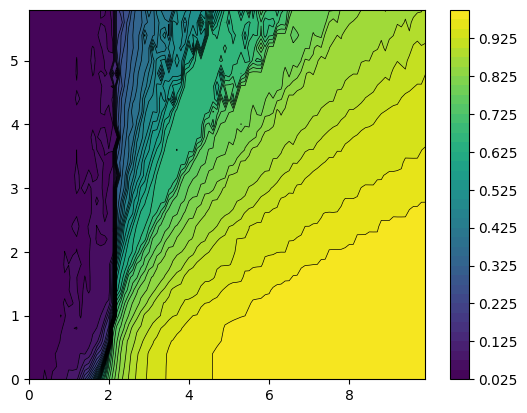

In [14]:
# plt.imshow(df_Km.unstack().g1.to_numpy().T,='lower')

origin = 'lower'
CS = plt.contourf(KK,MM,df_Km.unstack().r.to_numpy().T, 40, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
# plt.imshow(r)
plt.colorbar(CS)


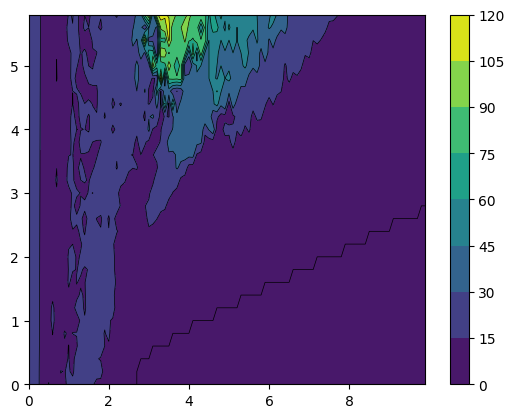

In [16]:
CS = plt.contourf(KK,MM,df_Km.unstack().g2.to_numpy().T, 10, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

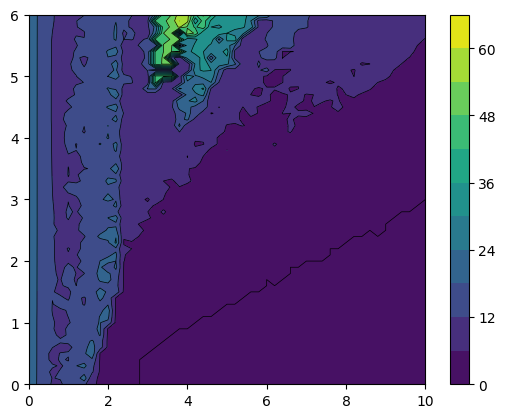

In [51]:
CS = plt.contourf(KK,MM,df_Km.unstack().g3.to_numpy().T, 10, cmap=plt.cm.viridis, origin=origin)
CS2 = plt.contour(CS, levels=CS.levels[::], colors='k',linewidths = 0.5, origin=origin)
plt.colorbar(CS)

In [266]:
Groups((1,3),N,theta_init=theta_random,omega=omega,t=t)

(0.04180803461102258,
 0.020898679974036875,
 array([15.398, 12.656, 10.876, 10.074,  9.546]),
 array([0.68380992, 1.46753671, 0.94054452, 0.66672633, 0.74019187]))

In [16]:
zip(KK,MM)

NameError: name 'KK' is not defined

In [17]:
def make_meanr(K,m):
    theta, dtheta,rs = mf2(K,m=m,N=N,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
    r = mean(rs)
    std_ = get_std(rs)
    g1,g2,g3,g4,g5 = np.mean(get_groups(dtheta)[-500:],axis=0)
    g1_std,g2_std,g3_std,g4_std,g5_std = np.std(get_groups(dtheta)[-500:],axis=0)
    return r,std_,g1,g2,g3,g4,g5,g1_std,g2_std,g3_std,g4_std,g5_std
func = lambda K,m: make_meanr(K,m)
K_ = np.vectorize(func)
KK,MM = np.meshgrid(Ks,ms)
# r,std_,g1,g2,g3,g4,g5,g1_std,g2_std,g3_std,g4_std,g5_std = K_(KK,MM)

In [21]:
for i in zip(KK,MM):print(i[0])

(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
(101,)
